# Домашнее задание к лекции "Визуализация данных"

Данные взяты отсюда:
[Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams/discussion)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
stud_preformance = pd.read_csv('StudentsPerformance.csv')
stud_preformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [63]:
stud_preformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Text(0.5, 1.03, 'Correlation between math, reading, and writing scores')

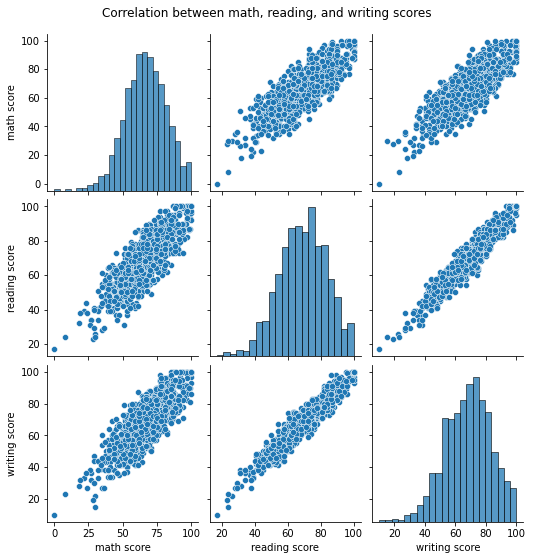

In [103]:
g = sns.pairplot(stud_preformance)
g.fig.suptitle('Correlation between math, reading, and writing scores', y=1.03)

Все оценки имеют прямую зависимость от друг друга.

В то же время оценки за чтение и оценки за письмо имеют корреляцию выше, чем оценки за чтение и оценки за математику, которая в свою очередь примерно равна корреляции оценок за письмо и оценок за математику.

Распределение у всех трех переметров почти однаковое и основная масса значений сосредоточена в диапазоне 60-80, хотя у письма и чтения оценки расположены немного более равномерно.

In [9]:
# Создадим сводную таблицу с колонками по расе, индексом по уровню образования родителей и значениями оценок по чтению
reading_scores_parental_edu_race = stud_preformance.pivot_table(
    values='reading score',
    columns='race/ethnicity',
    index='parental level of education',
    aggfunc=np.mean).sort_values('group C')
reading_scores_parental_edu_race

race/ethnicity,group A,group B,group C,group D,group E
parental level of education,,,,,
high school,62.888889,63.458333,64.421875,64.409091,70.318182
some high school,62.083333,66.447368,65.632653,69.980000,69.555556
some college,65.777778,65.756757,69.420290,70.880597,72.628571
master's degree,64.666667,80.166667,70.526316,77.173913,82.125000
associate's degree,67.071429,69.585366,71.128205,70.540000,73.820513
bachelor's degree,68.083333,72.950000,75.675000,70.142857,74.833333


[Text(0.5, 1.0, 'Reading score distribution in terms of parental level of education and ethnicity group')]

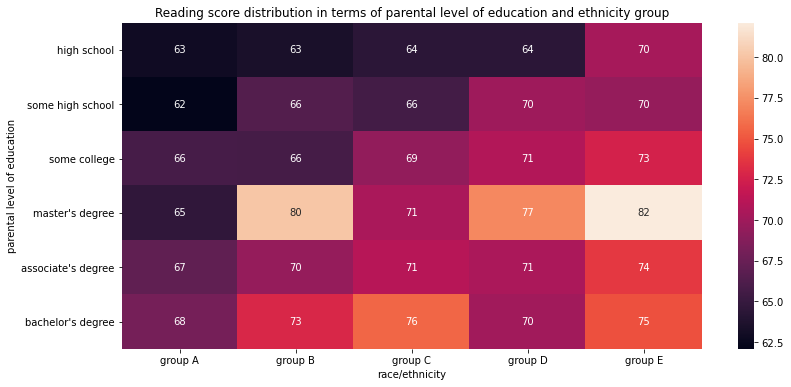

In [13]:
sns.heatmap(reading_scores_parental_edu_race, annot=True).set(title='Reading score distribution in terms of parental level of education and ethnicity group')

Из графика видно, что с повышением уровня образования родителей растут оценки по чтению. Также у этнических групп D и E оценки в целом выше, чем у остальных.

Не смотря на то что в целом оценки по чтению в группе B ниже, чем у C, D и E, если уровень образования родителей находится на уровне магистратуры, то оценки даже выше, чем у почти всех остальных групп.

In [14]:
# Отсортируем даннеы по оценкам по математике для больше наглядности boxplot
stud_preformance_sorted = stud_preformance.sort_values('math score')

[Text(0.5, 1.0, 'Influence of parental level of education and completed test preparation course on math score')]

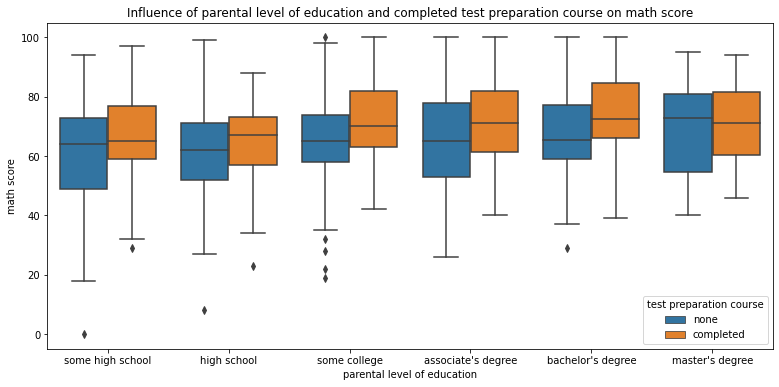

In [15]:
sns.boxplot(x='parental level of education', y='math score', hue='test preparation course', data=stud_preformance_sorted).set(title='Influence of parental level of education and completed test preparation course on math score')

Интересно, что выбросы присутствуют только в случаях, когда студенты на проходили подготовительных курсов, и в основном в сторону меньших оценок по матемитике.

Также видно, что подготовительные курсы тем меньше влияют на оценки, чам выше уровень образования родителей.

Стоит упомянуть, что разброс значений уменьшается с ростом уровеня образования родителей и фактом прохождения подготовительных курсов.

[Text(0.5, 1.0, 'Correlation between reading and math scores in terms gender')]

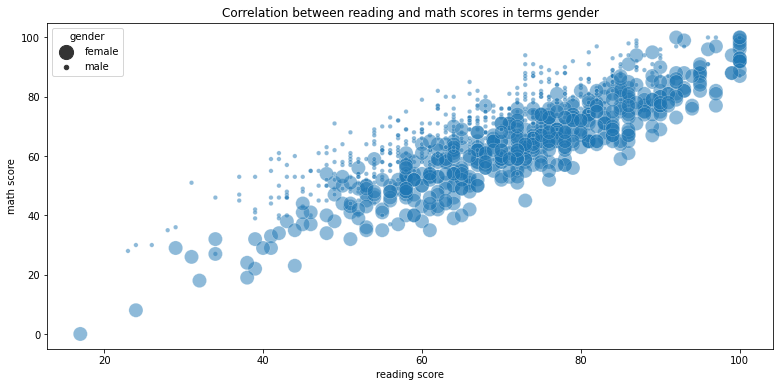

In [37]:
sns.scatterplot(x='reading score', y='math score', size='gender', alpha=0.5, sizes=(20,200), data=stud_preformance).set(title='Correlation between reading and math scores in terms gender')

Из точечной диаграммы сверху видно, что исключая выбросы оценки по математике и по чтению имеют высокую корреляцию, как уже было замечено ранее.

Также отметим, что корреляция между двумя этими показателями выше у мужчин.

[Text(0.5, 1.0, 'Correlation between reading and math scores in terms of lunch')]

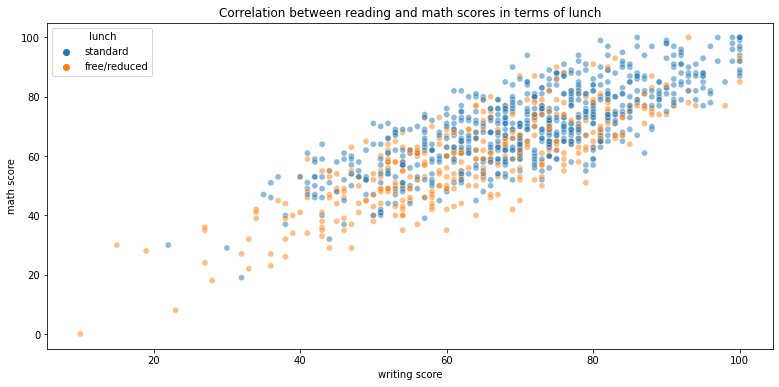

In [36]:
sns.scatterplot(x='writing score', y='math score', hue='lunch', alpha=0.5, data=stud_preformance).set(title='Correlation between reading and math scores in terms of lunch')

В целом вид ланча не слишком влияет на корреляцию между оценками по математике и по письму. Разве что выбросов больше при бесплатной опции.

[Text(0.5, 1.0, 'Writing score in terms of parental level of education and gender')]

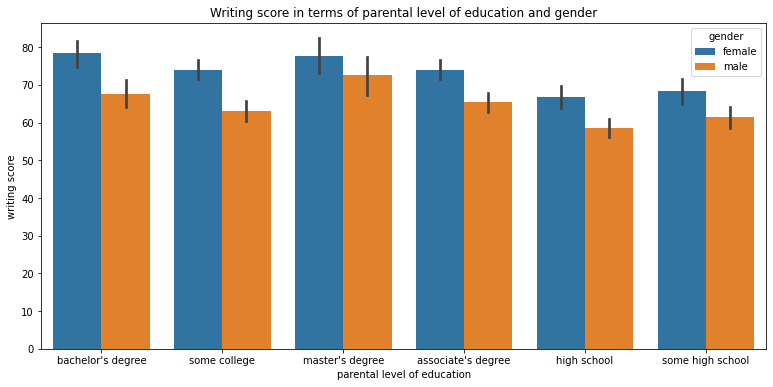

In [43]:
sns.barplot(x='parental level of education', y='writing score', hue='gender', data=stud_preformance).set(title='Writing score in terms of parental level of education and gender')

Можно сказать, что оценки по письму не сильно зависят от уровня образования родителей.

В то же время пол оказывает видимое влияние на этот параметр, женщины получают оценки выше, чем мужчины при разделении по уровню образования родителей.